<a href="https://colab.research.google.com/github/Maxxx-VS/The-Founder/blob/master/41_4_YOLO%3D%3D4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install ultralytics

In [ ]:
import ultralytics
from ultralytics import YOLO
import os
from PIL import Image
import cv2
from IPython.display import Video
import glob
# import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
ultralytics.checks()

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


In [ ]:
!wget https://storage.yandexcloud.net/academy.ai/CV/chess_yolo.zip

--2025-02-23 07:56:35--  https://storage.yandexcloud.net/academy.ai/CV/chess_yolo.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39275734 (37M) [application/x-zip-compressed]
Saving to: ‘chess_yolo.zip’

chess_yolo.zip      100%[===================>]  37.46M  12.0MB/s    in 4.0s    

2025-02-23 07:56:40 (9.34 MB/s) - ‘chess_yolo.zip’ saved [39275734/39275734]



In [ ]:
!unzip -qo "chess_yolo.zip"

In [ ]:
yaml_path = './chess_yolo/data.yaml'

In [ ]:
model = YOLO('yolov3.pt')

PRO TIP 💡 Replace 'model=yolov3.pt' with new 'model=yolov3u.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 198M/198M [00:03<00:00, 56.0MB/s]


In [ ]:
results = model.train(
    data=yaml_path,   # путь к конфигурационному файлу
    epochs=5,        # число эпох
    batch=32,         # размер пакета
    imgsz=480,        # размер входного изображения
    plots= True       # сохранять графики
)

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov3.pt, data=./chess_yolo/data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=480, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True,

100%|██████████| 22.2M/22.2M [00:00<00:00, 239MB/s]


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 1]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     37056  ultralytics.nn.modules.block.Bottleneck      [64, 64]                      
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    295680  ultralytics.nn.modules.block.Bottleneck      [128, 128]                    
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  8   4724736  ultralytics.nn.modules.block.Bottleneck      [256, 256]                    
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 82.8MB/s]


AMP: checks passed ✅


train: Scanning /content/chess_yolo/train/labels... 606 images, 0 backgrounds, 0 corrupt: 100%|██████████| 606/606 [00:00<00:00, 1614.30it/s]

train: WARNING ⚠️ /content/chess_yolo/train/images/26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.0fe973299ff9e73874d9e684cba4e406.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/chess_yolo/train/images/26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.5e1a9d49ad09f5a7549225a05e1f66a6.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/chess_yolo/train/images/26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.bb226be189ee3a6399fbbd5080852e5b.jpg: 1 duplicate labels removed


train: New cache created: /content/chess_yolo/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/chess_yolo/valid/labels... 58 images, 0 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<00:00, 656.84it/s]

val: New cache created: /content/chess_yolo/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 84 weight(decay=0.0), 91 weight(decay=0.0005), 90 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 480 train, 480 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      6.59G      2.149      4.984      1.564        430        480:   5%|▌         | 1/19 [00:02<00:39,  2.17s/it]

        1/5      7.18G      2.078      4.988      1.557        360        480:  11%|█         | 2/19 [00:03<00:30,  1.78s/it]
100%|██████████| 755k/755k [00:00<00:00, 18.9MB/s]
        1/5        14G      1.584      3.222      1.287        274        480: 100%|██████████| 19/19 [00:26<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.50s/it]

                   all         58        386      0.396       0.77      0.639      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5        14G      1.219     0.9354      1.075        372        480: 100%|██████████| 19/19 [00:26<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

                   all         58        386       0.83      0.853      0.874      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      13.9G      1.119     0.6965      1.041        638        480: 100%|██████████| 19/19 [00:27<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all         58        386      0.851      0.889      0.974      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      12.9G      1.071     0.5702      1.019        537        480: 100%|██████████| 19/19 [00:29<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.56s/it]

                   all         58        386      0.954      0.968      0.986      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      13.6G      1.065     0.5451      1.009        401        480: 100%|██████████| 19/19 [00:27<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all         58        386      0.983       0.99      0.988      0.741



5 epochs completed in 0.063 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 207.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 207.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv3 summary (fused): 96 layers, 103,674,263 parameters, 0 gradients, 282.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]


                   all         58        386      0.983       0.99      0.988      0.741
           черный слон         13         22      0.997      0.955      0.968       0.66
         черный король         29         29      0.992          1      0.995      0.778
           черный конь         26         30      0.989          1      0.995      0.756
          черная пешка         25         77      0.997          1      0.995       0.71
          черный ферзь         11         11       0.97          1      0.995      0.798
          черная ладья         24         28      0.998          1      0.995      0.707
            белый слон         17         22      0.944          1      0.965      0.696
          белый король         29         29       0.99          1      0.995      0.798
            белый конь         17         19      0.932          1      0.993       0.75
           белая пешка         26         77      0.996          1      0.995      0.736
           белый ферз

In [ ]:
import random
test_dir = "./chess_yolo/test"
img_dir = os.path.join(test_dir, '*.jpg')
files = glob.glob(img_dir)

In [ ]:
import matplotlib.pyplot as plt


image 1/1 /content/chess_yolo/test/410993714e325a1de3e394ffe860df3a_jpg.rf.657c49ca295ef54da23469189070a075.jpg: 480x480 2 черный слонs, 1 черный король, 2 черный коньs, 6 черная пешкаs, 1 черный ферзь, 2 черная ладьяs, 2 белый слонs, 1 белый король, 2 белый коньs, 6 белая пешкаs, 1 белый ферзь, 1 белая ладья, 62.8ms
Speed: 2.1ms preprocess, 62.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 480)


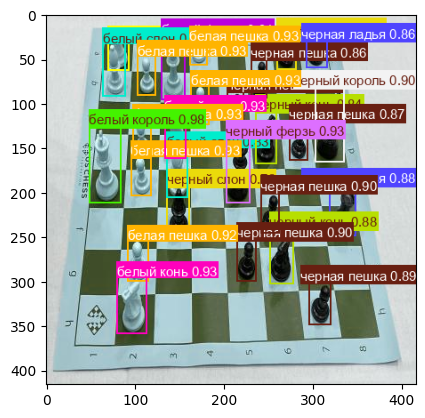

In [ ]:
image_test_path = random.choice(files)

pred = model.predict(source=image_test_path,
                        imgsz=480)

test_image = pred[0].plot(line_width=2)
plt.imshow(test_image)